<!DOCTYPE html>

<html>

<head>

<title>Magos da Furadeira</title>

</head>

<body>

<div style="display: flex; align-items: center;">

<img src="https://i.ibb.co/z490FF5/FUNDO-REMOVIDO.png" alt="FUNDO REMOVIDO">

<p style="margin-left: 40px; font-size: 24px; font-weight: bold; border-bottom: 1px solid black;">José David e Gabriel Torquarto - <br> Magos da Furadeira Bosch de Impacto </p>

</div>

</body>

</html>

 

### **Dados 2 - Normalizando e transformando dados**

**ID:** Dados 02

**Proponente:** Patrulheiro Formidável Amarelo

**Objetivo:** Escolha um conjunto de dados qualquer que contenha pelo menos 1 coluna com dados numéricos (pode ser atributo ou target, tanto faz). Faça operações de normalização e transformação neste dataset e observe o que acontece.

**Comentários adicionais:** Não é para intercalar operações de normalização e transformação, basta executar estas operações e observar o resultado.

**Pontuação máxima:** 10 pontos

In [60]:
import seaborn as sbn

In [61]:
atencao = sbn.load_dataset('car_crashes', cache=True, data_home=None)
#display(atencao)

Nesta atividade usaremos a biblioteca seaborn (como sbn) pois ela contém todas as funções necessárias para normalizarmos os dados.
Para essa atividade utilizamos um dataset com dados referentes a diamantes, tais como cor, preço, corte, peso e claridade. No entanto, a coluna a ser trabalhada será a de preços, que demonstrou maior variância.

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='price', ylabel='Count'>

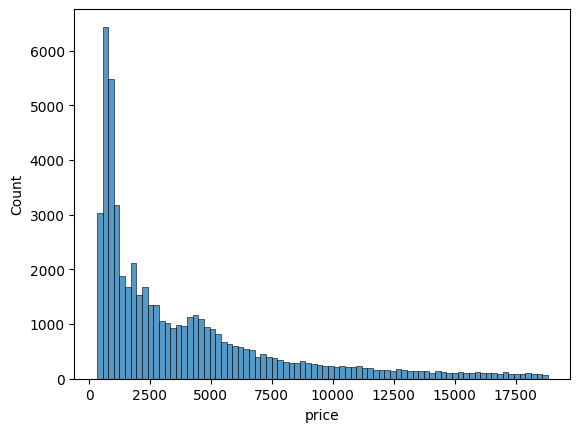

In [62]:
diamantes = sbn.load_dataset('diamonds', cache=True, data_home=None)
display(diamantes)
#print("\n Tipos de variável:\n", diamantes.dtypes)
#print("\n Tipos de variável(convertidas):\n", diamantes.convert_dtypes().dtypes)
sbn.histplot(x = diamantes['price'])

No histograma acima está representada a distribuição de preços de cada diamante. Note que a distribuição é bem desigual, tendo valores exorbitantemente superiores a outros.
No contexto do tratamento de dados, muitos datasets trabalhados apresentam valores com enorme variação, como o exemplo acima. Nesse sentido, é necessário que se faça a normalização desses valores. A normalização é um processo realizado como parte da preparação de dados para o aprendizado de máquina. Ela é aplicada quando pretendemos mudar os valores de uma coluna, de modo que fiquem numa escala comum. Há muitas formas de normalizar dados, como: zscore, max e min, logística, lognormal, etc. Além disso, quando se trabalha com escalas de grandezas diferentes, pode ocorrer de uma se sobressair sobre outras por ter uma variância de uma maior ordem de grandeza, comprometendo outras características importantes da análise estatística. <sup>[1], [5]</sup>

In [63]:
# exibindo apenas a coluna de interesse para fins ilustrativos
display(diamantes['price'])

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

<Axes: xlabel='price_zscore', ylabel='Count'>

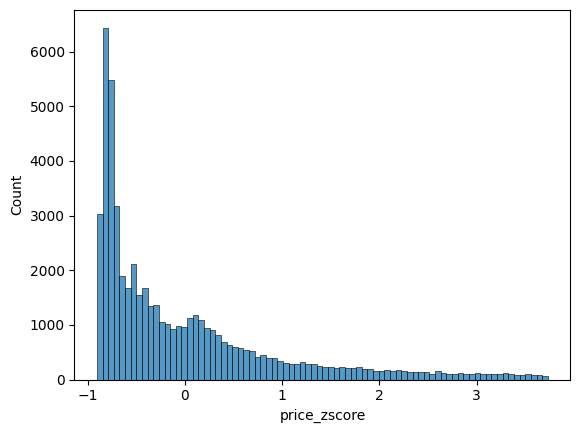

In [64]:
media = diamantes['price'].mean()
desvio_padrao = diamantes['price'].std()

diamantes['price_zscore'] = (diamantes['price'] - media) / desvio_padrao

sbn.histplot(x=diamantes['price_zscore'])

Na célula acima aplicou-se a normalização por zscore. Essa normalização consiste em subtrair a média de todos os valores de cada valor, e em seguida dividi-los pelo desvio padrão. Essa técnica geralmente é utilizada quando queremos tornar os dados comparáveis, o que resulta em uma distribuição normal com média zero e desvio padrão igual a um. <sup>[2]<sup>

## Realizando transformação no dataset

In [65]:
precos = diamantes.copy()
precos["price"] = diamantes["price"] * 4.94
#print(precos['price'])

O dataset escolhida contém os preços de cada diamante, entretanto, esses valores estão em dólar <sup>[3]</sup>. Logo, a transformação mais interessante a se fazer seria converter esses valores para o real brasileiro. Após pesquisas, viu-se que o valor de 1 dólar americano custa 4,94 reais<sup>[4]</sup>. Com essa conversão, notou-se que houve um salto quanto aos preços e que caberia uma normalização desses valores. Dessa vez, a normalização escolhida foi a normalização pelo máximo absoluto.

In [66]:
maximo = diamantes['price'].max()

diamantes['preco_norm_max_abs'] = diamantes['price'] / maximo

#print(diamantes['preco_norm_max_abs'])

<Axes: xlabel='preco_norm_max_abs', ylabel='Count'>

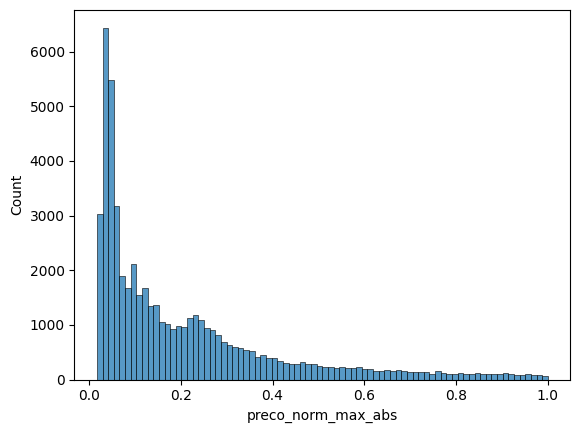

In [67]:
sbn.histplot(diamantes, x="preco_norm_max_abs", hue=None)

A normalização pelo máximo absoluto consiste basicamente em dividir todos os valores pelo maior valor da coluna, fazendo com que o maior valor seja representado pelo número 1. Um fato importante é que esse tipo de normalização mantém a esparsidade dos dados, caso haja.

## Conclusão
Com a conclusão da atividade podemos compreender na prática a funcionalidade dos mecanismos de transformação e normalização. A transformação nos permite adequar os dados para uma finalidade específica, sem a necessidade da criação de novas colunas. A normalização, por sua vez, permite-nos manipular os dados de forma que eles fiquem mais compreensíveis, no sentido de adequar à uma escala. 

## Referências

[1] LIKEBUPT. Normalizar Dados: referência de componente - Azure Machine Learning. Disponível em: <https://learn.microsoft.com/pt-br/azure/machine-learning/component-reference/normalize-data?view=azureml-api-2>. Acesso em: 22 ago. 2023.

[2] Normalização de Dados. Disponível em: <https://www.linkedin.com/pulse/normaliza%C3%A7%C3%A3o-de-dados-jose-r-f-junior-1f/?originalSubdomain=pt>. Acesso em: 22 ago. 2023.

[3] Prices of over 50,000 round cut diamonds — diamonds. Disponível em: <https://ggplot2.tidyverse.org/reference/diamonds.html>.

‌[4] USD/BRL Currency Exchange Rate & News - Google Finance. Disponível em: <https://www.google.com/finance/quote/USD-BRL?sa=X&ved=2ahUKEwiGubnbtvGAAxXEqZUCHQwABXgQmY0JegQIBhAr>. Acesso em: 22 ago. 2023.

‌[5] ARAÚJO, R. Padronização e Normalização em Ciência de Dados. Como Fazer? Disponível em: <https://www.hashtagtreinamentos.com/padronizacao-e-normalizacao-em-ciencia-de-dados>. Acesso em: 23 ago. 2023.

‌

‌

‌